In [1]:
from xgboost import XGBRegressor
from sklearn.linear_model import Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from main_ml import main
from viz_ml import *

### 조건 설정

In [2]:
# Raw_Data.xlsx를 두고 있는 폴더의 경로
path = 'C:/Users/KRX/Projects/Capacity_Planning/Data/'
# 분석 데이터 선택
path_data = path+'Raw_Data.xlsx'
# 상관관계 데이터 저장 경로
path_data_corr = path+'Raw_Data_corr.xlsx'

# 도메인지식을 활용하여 선택한 최종 변수
lst_sel_features = ["N_Order", "N_Trade", "P_Trading_Volume_F", 
                    "N_Investor", "N_Traded_Symbol_O", "P_Margin","P_K200S","P_VKOSPI"]
# 주요 변수 선택(all 모델에서는 불필요)
Stat_Features = ["N_Order_T1","P_VKOSPI_T1","Max_Capacity"]

# 모델 종류 - 현재 해당 분석에서 모델들은 모두 사용하게 설정
# 따라서, 파라미터의 범위만 변경 가능
model_rf = RandomForestRegressor()
model_dt = DecisionTreeRegressor()
model_lasso = Lasso()
model_ridge = Ridge()
model_xgb = XGBRegressor()

# 모델별 튜닝할 파라미터 선택
lst_params_rf = {"bootstrap":[False], "n_estimators":[3, 10], "max_features":[4, 8, 12, 16, 20]}
lst_params_dt = {"criterion": ["mse", "mae"], "min_samples_split": [5, 10, 20], "max_depth": [6, 8, 10, 12],
                 "min_samples_leaf": [5, 10, 15, 20], "max_leaf_nodes": [5, 10, 20]}
lst_params_lasso = {"alpha":[0.001, 0.01, 0.1, 1, 10, 100, 1000]}
lst_params_ridge = {"alpha":[0.001, 0.01, 0.1, 1, 10, 100, 1000]}
lst_params_xgb =  {'max_depth':[ 6, 8, 10, 12],'n_estimators':[3, 10, 20],'colsample_bytree':[0.5,0.7,1],
                   'colsample_bylevel':[0.5,0.7,1]}
dict_modelling = {
                        'Randomforest' : [model_rf, lst_params_rf],
                        'Decisiontree' : [model_dt, lst_params_dt],
                        'Lasso' : [model_lasso, lst_params_lasso],
                        'Ridge' : [model_ridge, lst_params_ridge],
                        'Xgboost' : [model_xgb, lst_params_xgb]
                 }

# 생성 X,Y 조합 선택
lst_XY = [(10,20),(20,20),(20,40),(40,40),(60,40),(40,60),(60,60),(120,60),(120,120)]
#lst_XY = [(60,40),(40,60),(60,60)]

### 분석 실행

In [3]:
config = {
            "path" : path,
            "path_data" : path_data,
            "path_data_corr" : path_data_corr,
            "lst_sel_features" : lst_sel_features,
            "Stat_Features" : Stat_Features,
            "dict_modelling" : dict_modelling,
            "lst_XY" : lst_XY   
         }

result, result_valid = main(config, 'all')

(X,Y) (10, 20) 모델 별 결과
Randomforest 모델
Test result
R2                  : 0.9309
MAE                 : 2365245.28
MSE                 : 10721835311934.57
RMSE                : 3274421.37
MAPE                : 14.08
MPE                 : -8.00
Validation result
R2                  : 0.8685
MAE                 : 2773984.06
MSE                 : 16275373709297.83
RMSE                : 4034274.87
MAPE                : 16.84
MPE                 : -12.48
Decisiontree 모델
Test result
R2                  : 0.8071
MAE                 : 3486047.89
MSE                 : 29910857930398.60
RMSE                : 5469082.00
MAPE                : 19.04
MPE                 : -10.11
Validation result
R2                  : 0.5701
MAE                 : 4276135.88
MSE                 : 53212835805200.36
RMSE                : 7294712.87
MAPE                : 22.73
MPE                 : -13.58
Lasso 모델
Test result
R2                  : 0.9276
MAE                 : 2324116.38
MSE                 : 1122720997503

Lasso 모델
Test result
R2                  : 0.8844
MAE                 : 2659685.51
MSE                 : 15253272298760.03
RMSE                : 3905543.79
MAPE                : 14.49
MPE                 : -3.89
Validation result
R2                  : 0.8452
MAE                 : 3121255.79
MSE                 : 20810981284627.82
RMSE                : 4561905.44
MAPE                : 17.01
MPE                 : -9.24
Ridge 모델
Test result
R2                  : 0.8796
MAE                 : 2726806.16
MSE                 : 15879507017126.32
RMSE                : 3984909.91
MAPE                : 15.51
MPE                 : -5.14
Validation result
R2                  : 0.7694
MAE                 : 4208242.92
MSE                 : 31001874877925.59
RMSE                : 5567932.73
MAPE                : 23.44
MPE                 : -18.59
Xgboost 모델
Test result
R2                  : 0.9198
MAE                 : 2390804.25
MSE                 : 10583444709583.11
RMSE                : 3253220.67

Xgboost 모델
Test result
R2                  : 0.9152
MAE                 : 1931898.41
MSE                 : 7759551548983.32
RMSE                : 2785597.16
MAPE                : 12.46
MPE                 : -8.05
Validation result
R2                  : 0.9426
MAE                 : 2070270.03
MSE                 : 6906375144532.14
RMSE                : 2627998.32
MAPE                : 16.26
MPE                 : -14.61
(X,Y) (40, 60) 모델 별 결과
Randomforest 모델
Test result
R2                  : 0.9342
MAE                 : 1901824.95
MSE                 : 7939408377550.22
RMSE                : 2817695.58
MAPE                : 10.57
MPE                 : -5.54
Validation result
R2                  : 0.8669
MAE                 : 2836595.52
MSE                 : 15581571999371.12
RMSE                : 3947350.00
MAPE                : 16.31
MPE                 : -11.80
Decisiontree 모델
Test result
R2                  : 0.8638
MAE                 : 2652112.77
MSE                 : 16431663360995.

Decisiontree 모델
Test result
R2                  : 0.2921
MAE                 : 5130721.83
MSE                 : 58653642281771.55
RMSE                : 7658566.59
MAPE                : 30.13
MPE                 : -25.33
Validation result
R2                  : 0.5675
MAE                 : 2903524.89
MSE                 : 32059232912127.71
RMSE                : 5662087.33
MAPE                : 19.63
MPE                 : -13.76
Lasso 모델
Test result
R2                  : 0.7502
MAE                 : 3590410.58
MSE                 : 20701598190595.80
RMSE                : 4549900.90
MAPE                : 20.40
MPE                 : -18.02
Validation result
R2                  : 0.7197
MAE                 : 3363837.15
MSE                 : 20780824589792.76
RMSE                : 4558598.97
MAPE                : 18.72
MPE                 : -16.18
Ridge 모델
Test result
R2                  : 0.7319
MAE                 : 3750876.51
MSE                 : 22210126665052.88
RMSE                : 47

## 전체 데이터의 성능 평가

### test data 결과

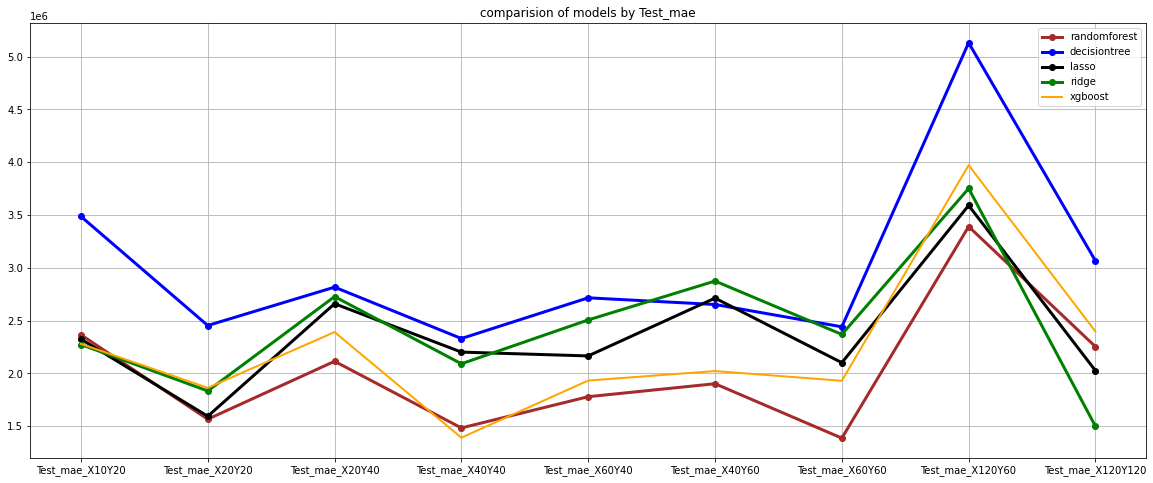

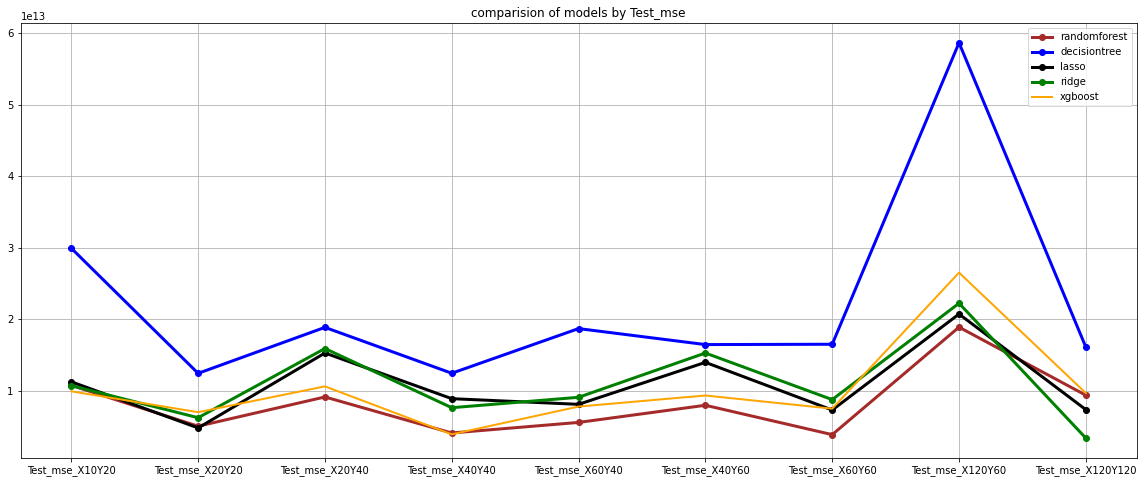

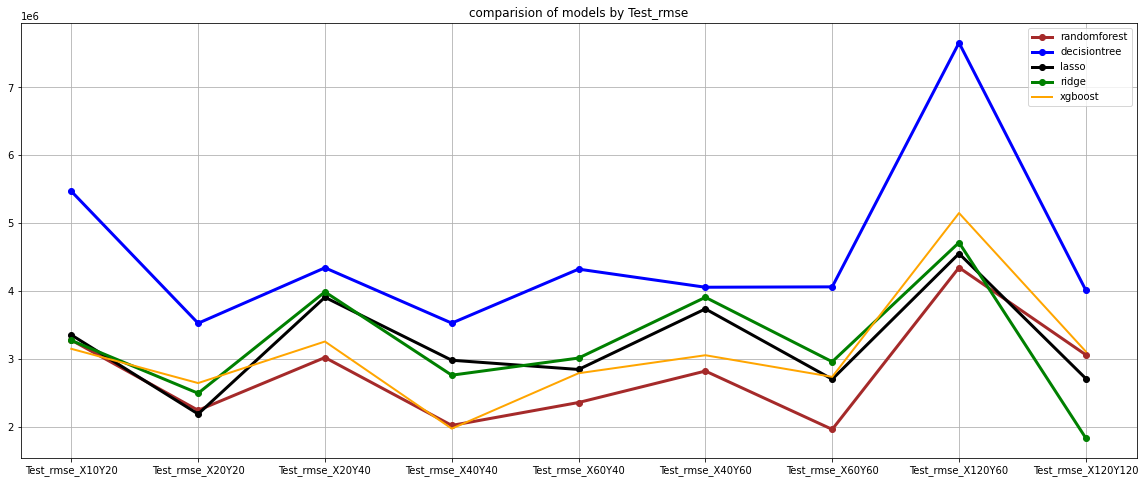

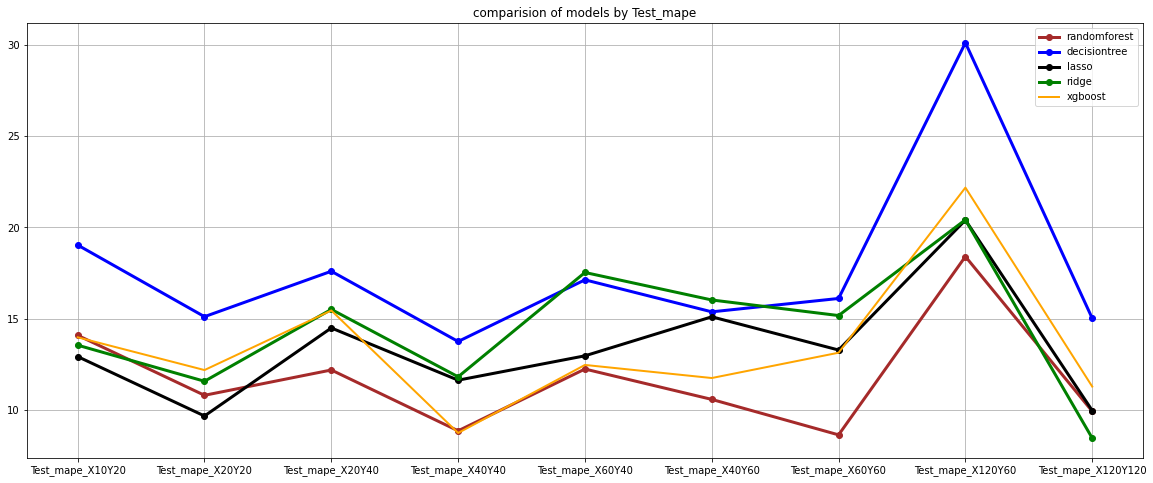

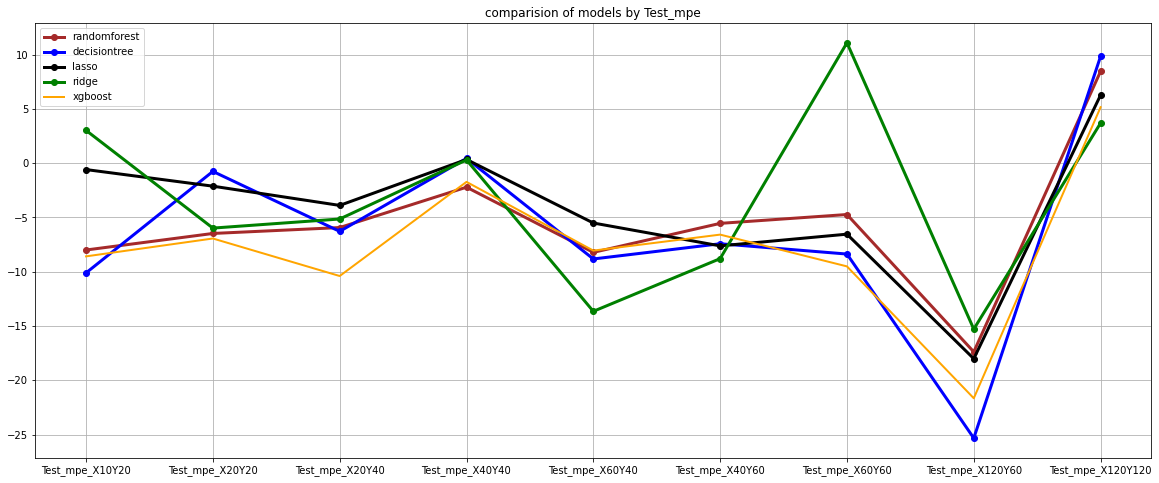

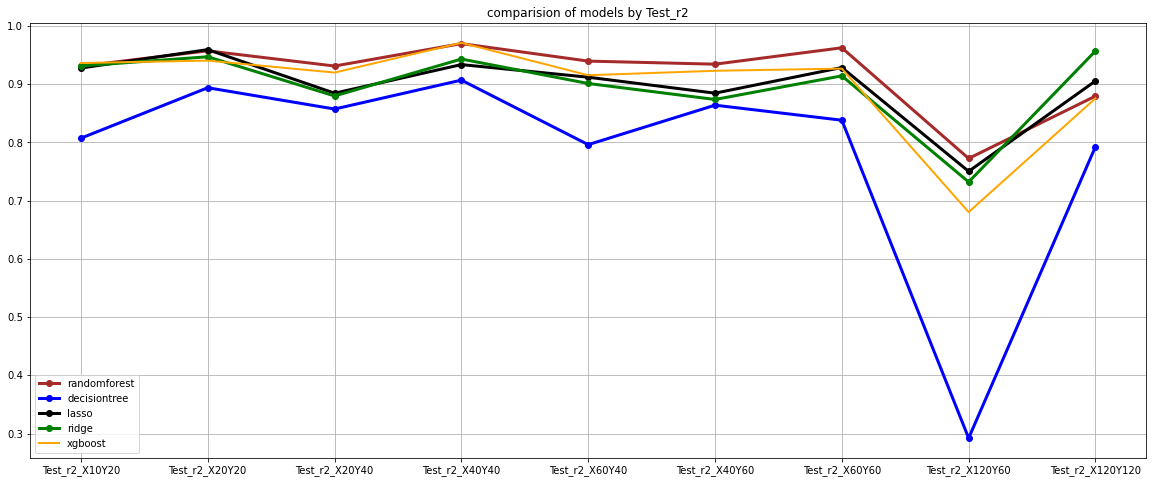

In [4]:
viz_total_evaluation(result, 'Test')

### validation data 결과

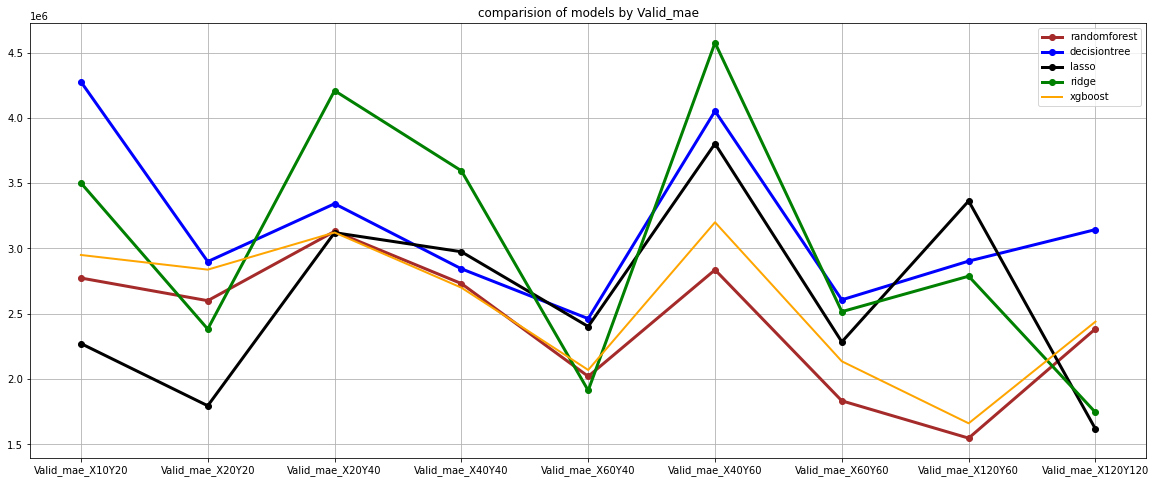

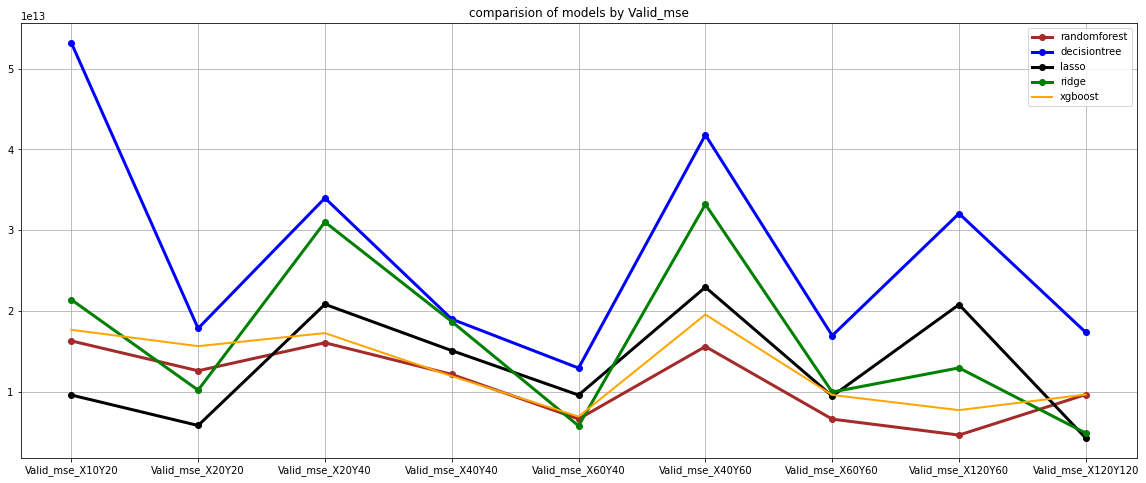

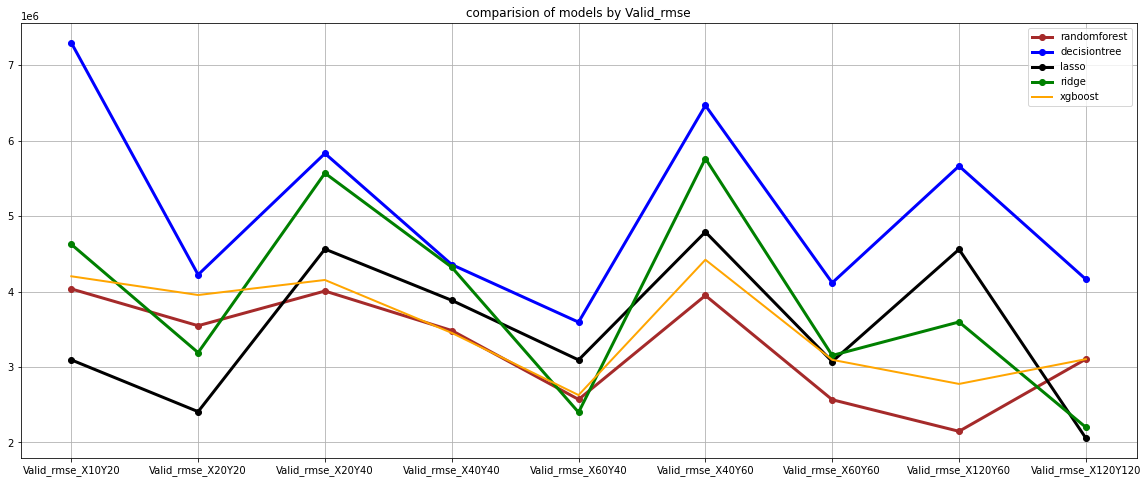

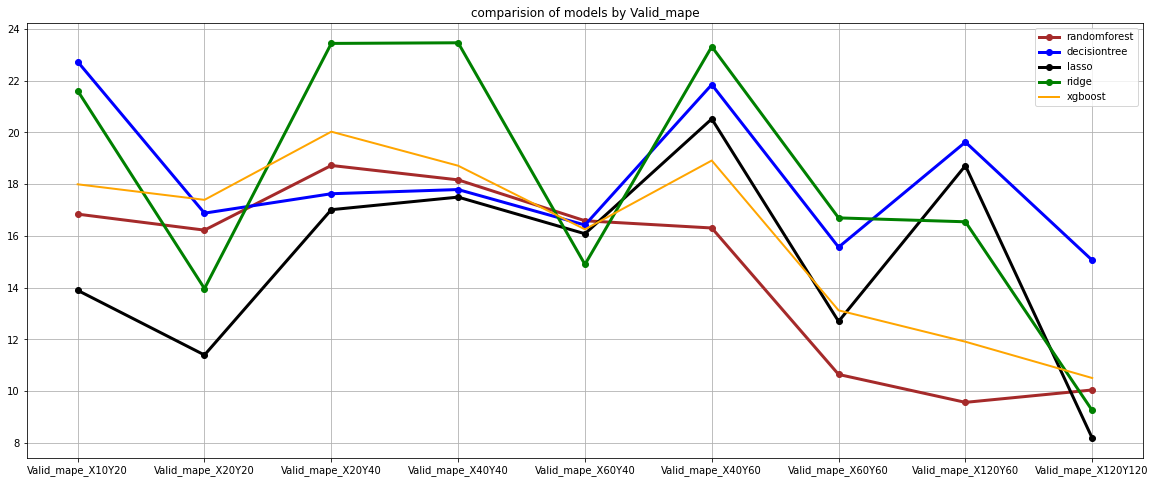

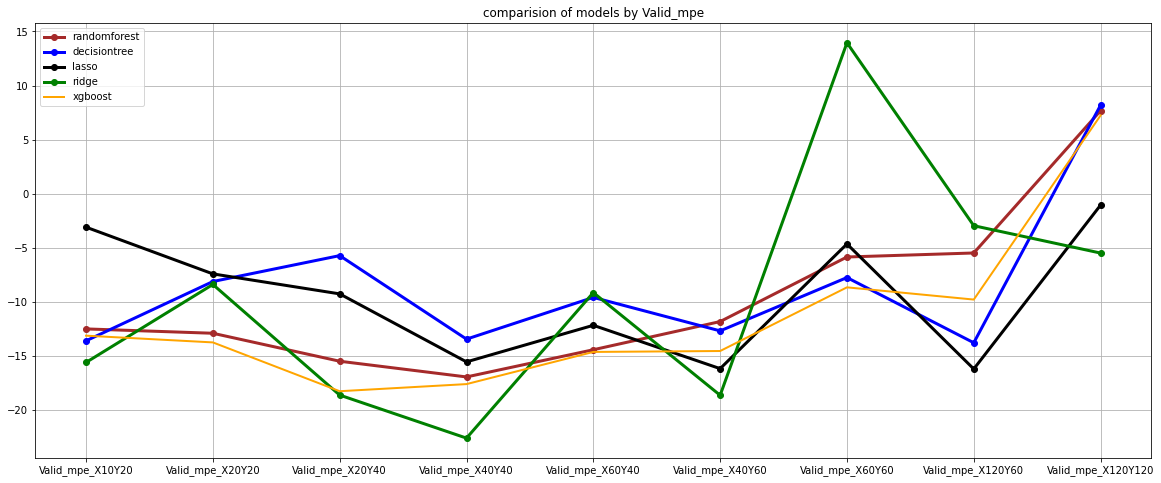

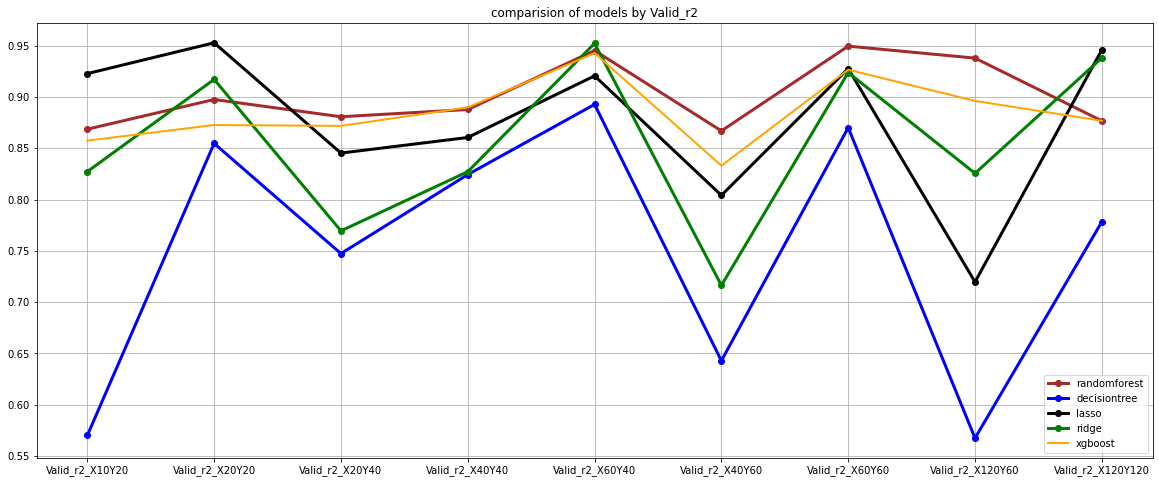

In [5]:
viz_total_evaluation(result_valid, 'Val')